# TheDogues1815: **Wiki's Wacky Covid News**

The goal of this project is to showcase the link between Wikipedia and the spread of Fake news, conspiracy theories, and general misinformation on COVID-19. Are there existing links? Does one influence the other? Let's see!

First we analyse the conspiracy theories in wikipedia and focus on the ones related to health. How important is covid in this? Second, let's focus on the misinformation linked with Covid and do the analysis of the pageview count in time. Lastly, we analyse the MM-Covid19 dataset and try to classify published news according to the ones found in Wikipedia.

# Part 1: Sketchy theories on Wikipedia

**Objective of this part:**
- Fetch wikipedia articles related to fake news.
- What are the main fake news on Wikipedia and how do their traction evolve during the pandemic?

**Methodology:**
- For this data we parse the [List of conspiracy theories](https://en.wikipedia.org/wiki/List_of_conspiracy_theories) page which has already done the job of listing the main fake news/conspiracy theories.
- Web sraping for pages focusing exclusively on summarising the fake news and conspiracy theories. For each fake news group, or fake news topic, we can scrape wikipedia articles and analyse them to see which catefory gained more views as a function of time.
- Analysis of the evolution of pageview count, focusing on the "health category".

**Possible improvements (feasible now that this basic setup is established):**
- Try to get more conspiracy categories and maybe reduced the number of groups or group by news criteria. We took the wikipedia original grouping for this part.
- Plot the evolution of the number of views of the fake news in comparison with normality to see if the increase is statistically significant.
- Expand this study to multiple languages, as these "summary" articles exist for multiple languages
- perform a t-test to see if the increase in Covid related news is significative compares to other types of fake news.




### Libraries and helper functions for this notebook

In [59]:
import re
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json
from pylab import *
import pandas as pd
from dogues_functions_2 import clean_article_name, plot_category_trends, fetch_pageview_count, normal_data, extract_clean_text, fetch_and_combine_pageview_data, scrape_wikipedia_sub_subheadings_with_links, fetch_pageview_count_dates, fetch_viewcount_df


### scraping headings and links of article referenced in the list of conspiracy theories page on Wikipedia

In [60]:
excel_file_path = 'Data/realFakeNewsNotLikeVictorsRealShy2.xlsx'

# Correspond to around 320 articles
new_res = pd.read_excel(excel_file_path)

#rename column
new_res.rename(columns={'name': 'Linked_Article'}, inplace=True)

new_res = new_res.drop_duplicates()
new_res.reset_index()

#remove the date for the articles that have a date next to the title
new_res.Linked_Article= new_res.Linked_Article.apply(clean_article_name)
#idea of the type of article
new_res.sample(5)

,mainCategory,subCategory,Linked_Article
205,"Race, religion and/or ethnicity",Antisemistic,Kalergi_Plan
149,Gender and sexuality,NaN,Soy_boy
10,Overview,Core topics,Urban_legends_and_myths
219,Regional,Middle East / North Africa,10_agorot_controversy
59,Deaths and disappearances,Assasination/Suicide theories,John_F._Kennedy_assassination_conspiracy_theories


``We have around 90 article that API from wikipedia isn't able to access. We will fix this issue for milestone 3!``

In [9]:
#Fetch the view count for all available articles
language = "en"
combined_df = fetch_and_combine_pageview_data(language, new_res)

Error fetching data for Aztec,_New_Mexico_crashed_saucer_hoax. Status Code: 404
Error fetching data for Alien_Autopsy_. Status Code: 404
Error fetching data for Conspiracy_theories_about_the_kidnapping_and_murder_of_Aldo_Moro. Status Code: 404
Error fetching data for Alejandro_Castro_. Status Code: 404
Error fetching data for 9/11_conspiracy_theories. Status Code: 404
Error fetching data for LGBT_chemicals_conspiracy_theory. Status Code: 404
Error fetching data for History_of_HIV/AIDS. Status Code: 404
Error fetching data for HIV/AIDS_in_the_United_States. Status Code: 404
Error fetching data for Gamergate_. Status Code: 404
Error fetching data for HIV/AIDS_denialism. Status Code: 404
Error fetching data for Discredited_HIV/AIDS_origins_theories. Status Code: 404
Error fetching data for Tartarian_Empire_. Status Code: 404
Error fetching data for Alaska_payment_conspiracy. Status Code: 404
Error fetching data for Ergenekon_. Status Code: 404
Error fetching data for German_Plot_. Status 

``This give us 240 articles we the view count for each month. The data is then organised merged to have the view count, main category, article all in one table.``

In [10]:
#Create with article name and the view count in function of the date

df_pivoted = combined_df.pivot_table(index='article', columns='timestamp', values='views', aggfunc='mean')

df_pivoted.reset_index(inplace=True)

#merge the data with the article with the corresponding ciews
merged_df = new_res.merge(df_pivoted, left_on='Linked_Article', right_on='article')
merged_df.drop(['subCategory','article' ],axis = 1, inplace=True)

#fill na with 0 
merged_df.fillna(0, inplace=True)

row_sums = merged_df.iloc[:, 2:].sum(axis=1)

# Add the row sums as a new column to the DataFrame 
merged_df['Row_Sums'] = row_sums

Final_consp_sorted = merged_df.sort_values(by='Row_Sums', ascending=False)
#Drop category overview wich is not very relevant
df_without_overview = Final_consp_sorted[Final_consp_sorted['mainCategory'] != 'Overview']
df_without_overview .sample(5)



,mainCategory,Linked_Article,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,Row_Sums
193,"Race, religion and/or ethnicity",New_World_Order_,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
126,False_flag,Smolensk_air_disaster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3239.0,...,19001.0,14804.0,22460.0,21672.0,19880.0,15703.0,18360.0,46091.0,17484.0,824303.0
78,Deaths and disappearances,Assassination_of_Benazir_Bhutto,13885.0,17049.0,23728.0,10875.0,11398.0,12029.0,11259.0,14930.0,...,11568.0,10004.0,28110.0,16622.0,17503.0,19841.0,14573.0,11557.0,22075.0,887989.0
111,"Energy, environment",Red_mercury,14703.0,14871.0,12708.0,12797.0,11914.0,12717.0,12420.0,14137.0,...,13274.0,12173.0,13192.0,22754.0,21614.0,22910.0,18619.0,12679.0,16822.0,1310384.0
86,Deaths and disappearances,Mary_Celeste,125114.0,46831.0,42122.0,37147.0,35958.0,38424.0,36490.0,43917.0,...,29418.0,35909.0,44618.0,50922.0,40814.0,36425.0,52824.0,38665.0,38966.0,2249214.0


## 1.1 Analysis of pageview count for the fake news categories

Now we aggregate the data into main categories the time series of the sum of each category.
So we can have an idea of the most impactful categories.

In [40]:
#aggregate data and categories and drop Linked articles
aggregated_data = df_without_overview.groupby('mainCategory').sum()
aggregated_data.drop('Linked_Article',axis=1, inplace=True)


 ``Now we plot of the fake news with a logarithmic y axis. 
 Here is a list of which type of fake/conspiracy theories belongs to wich category (not complete):``

- Astronomy and outer space:  Area_51, UFO...

- Race, religion and/or ethnicity: Armenian_genocide_denial,

- Deaths and disappearances: Osama_bin_Laden_death_conspiracy_theories Yitzhak_Rabin_assassination_conspiracy_theories

- Health: COVID-19_lab_leak_theory, MMR_vaccine_and_autism, COVID-19 Misinformation, SARS_conspiracy_theory

- Regional: FBI_secret_society_conspiracy_theory, Gezi_Park_protests

- False_flag: USS_Liberty_incident, Reichstag_fire

- Energy, environment: California_drought_manipulation_conspiracy_theory

- Gender and sexuality: Lavender_scare

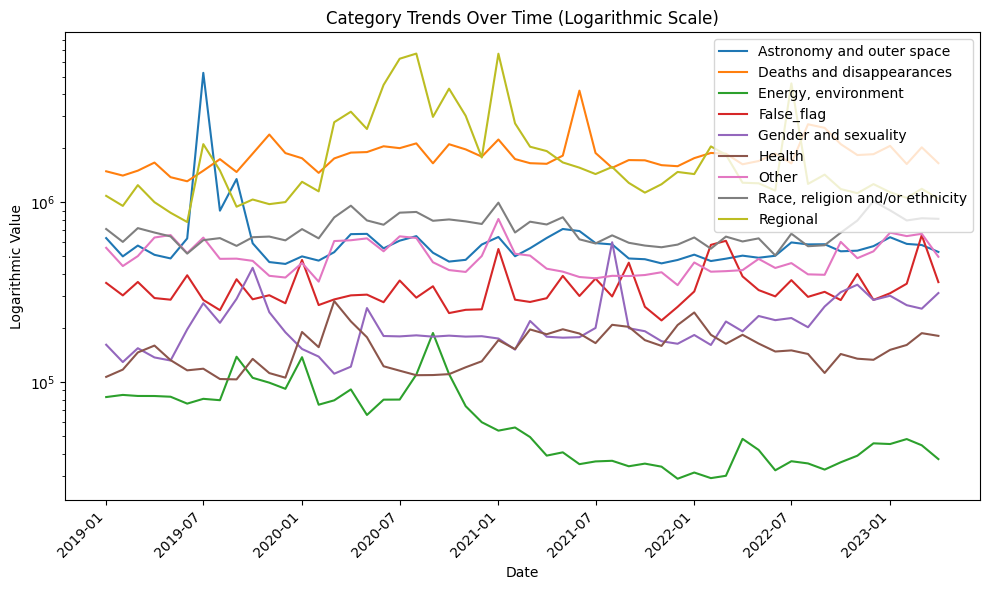

In [12]:
plot_category_trends(aggregated_data,use_log_scale=True)

``The "Regional" and "Deaths and disapearance" categories get the most views. However we see that there are a lot of peaks which look quite random. These could correspond to the publication of more fake news or a sudden increase in attention in specific news.``

``Now we plot the value of all the aggregated categories views to see if we have an increase in fake news interest when the Covid pandemic started.``

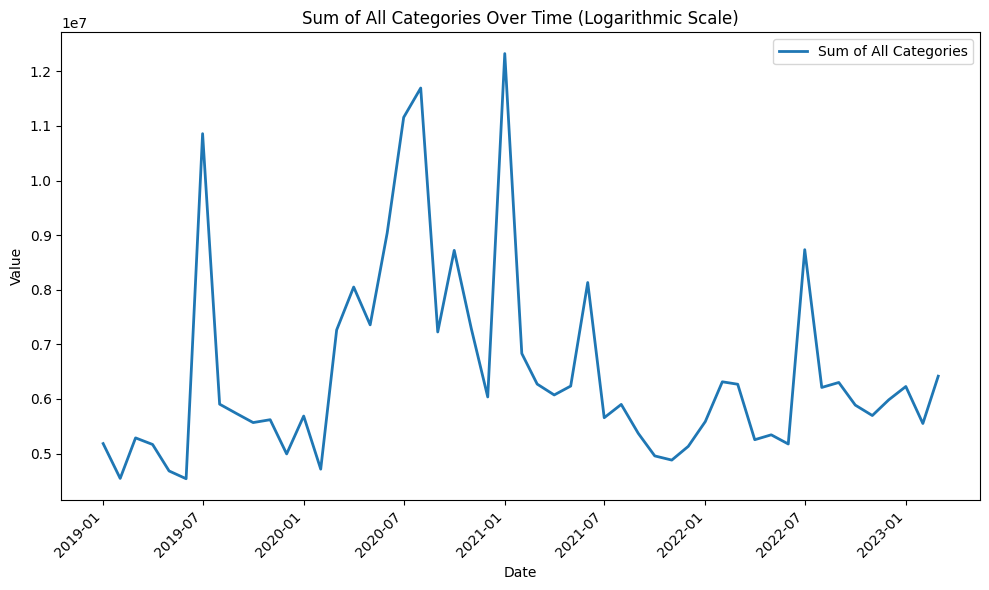

In [13]:
# Transpose the DataFrame for easier plotting
df_transposed = aggregated_data.iloc[:,:-3].transpose()

plt.figure(figsize=(10, 6)) 

# Calculate the sum of all categories
sum_all_categories = df_transposed.sum(axis=1)

# Plot the sum on a logarithmic scale
plt.plot(df_transposed.index, sum_all_categories, label='Sum of All Categories', linewidth=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sum of All Categories Over Time (Logarithmic Scale)')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


``For most of the world, quarantine started in March 2020. We see a big global increase in the number of views during this period, and we can observe a decrease back to normal after the pandemic. In milestone 3 we will explore if it is significant compared to normality. We also observe big peaks. It would be interested to explore which fake news lead to those huge increase or if it aligns with the interventions for specific countries. ``

``Now we plot the sum of the view count of the whole Covid period for each categories to see which categories are people more interested in.``

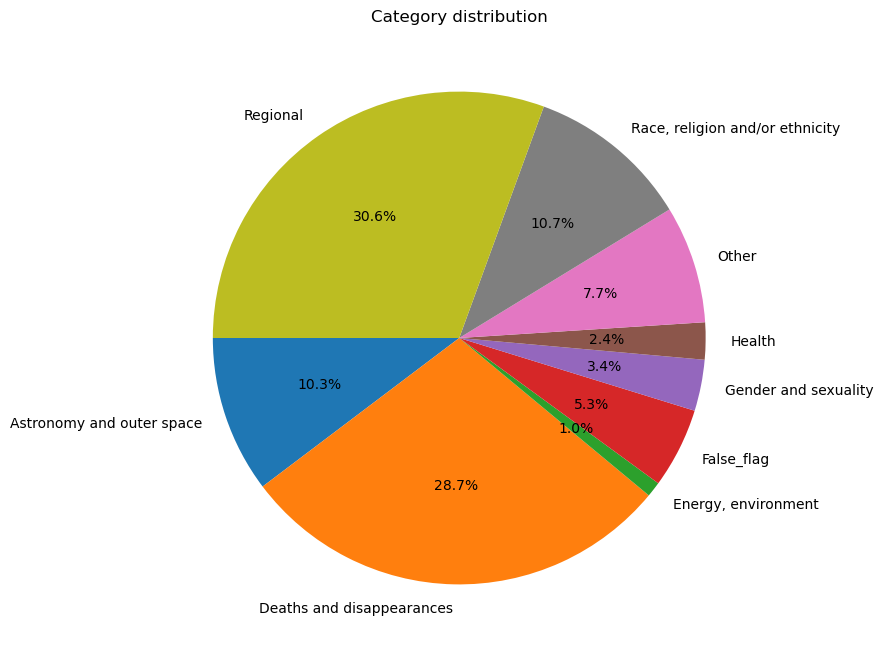

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(aggregated_data['Row_Sums'], labels=aggregated_data.index, autopct='%1.1f%%', startangle=180)

plt.title('Category distribution')

plt.show()

``We want to see if this distribution has significant differences before, during, and after Covid:``



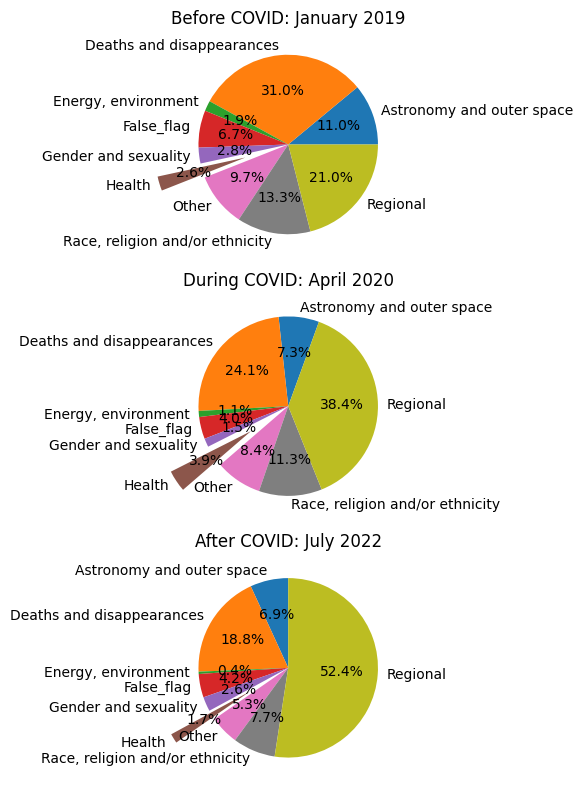

In [38]:
# Sum values along rows (axis=1)
row_sums = aggregated_data.sum(axis=1)

# Identify the index of the 'Health' category
health_category_index = aggregated_data.index.get_loc('Health')

plt.figure(figsize=(15, 8))

# Plot 1st pie chart
plt.subplot(3, 1, 1)
explode = [0.5 if i == health_category_index else 0 for i in range(len(aggregated_data))]
plt.pie(aggregated_data.iloc[:, 1], labels=aggregated_data.index, autopct='%1.1f%%', startangle=0, explode=explode, labeldistance=1.1)
plt.title('Before COVID: January 2019')

# Plot 2nd pie chart
plt.subplot(3, 1, 2)
explode = [0.5 if i == health_category_index else 0 for i in range(len(row_sums))]
plt.pie(aggregated_data.iloc[:, 14], labels=row_sums.index, autopct='%1.1f%%', startangle=70, explode=explode, labeldistance=1.1)
plt.title('During COVID: April 2020')

# Plot 3rd pie chart
plt.subplot(3, 1, 3)
explode = [0.5 if i == health_category_index else 0 for i in range(len(row_sums))]
plt.pie(aggregated_data.iloc[:, 42], labels=row_sums.index, autopct='%1.1f%%', startangle=90, explode=explode, labeldistance=1.1)
plt.title('After COVID: July 2022')

plt.tight_layout()
plt.show()


``The percentage of the health category changes from 2.6% to 3.9% (70% increase), and then goes down again to 1.7% (even lower than before the pandemic, probably because of the significant increase in regional fake news). ``

## 1.2 A deeper look into "Covid-19 Misinformation"

``We go more into details and look at how the Covid-19_Misinformation page's view count evolved during the pandemic compared to the other health articles:``

``For that we first extract the view count of Covid-19_Misinformation page and plot it against the mean value of all the other articles.``

In [39]:
#Get the article related to health and put them in appropriate format to plot

final_health= Final_consp_sorted[merged_df['mainCategory'] == 'Health']
final_health.drop('mainCategory', axis = 1, inplace=True)
final_health.set_index('Linked_Article', inplace=True)


/tmp/ipykernel_104/1110697419.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_health= Final_consp_sorted[merged_df['mainCategory'] == 'Health']
/tmp/ipykernel_104/1110697419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_health.drop('mainCategory', axis = 1, inplace=True)


In [ ]:
mean_per_article = final_health.mean(axis=0)

# Add a new row to the DataFrame with the sums
final_health.loc['Mean_of_article'] = mean_per_article


rows_to_keep = ['Mean_of_article', 'COVID-19_misinformation']

# Use the loc method to filter the DataFrame
filtered_health__df = final_health.loc[final_health.index.isin(rows_to_keep)]

# Display the resulting DataFrame
filtered_health__df.head()


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_11028\2473681769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_health.loc['Mean_of_article'] = mean_per_article


,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,Row_Sums
Linked_Article,,,,,,,,,,,,,,,,,,,,,
COVID-19_misinformation,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15071.000000,20361.00000,21128.000000,18940.0,18820.000000,14570.000000,17568.000000,14078.000000,14952.00000,1.085698e+06
Mean_of_article,4656.869565,5112.782609,6367.347826,6952.913043,5769.26087,5064.478261,5170.956522,4531.565217,4510.173913,5863.478261,...,4897.347826,6241.26087,5877.086957,5795.0,6581.478261,7007.782609,8150.478261,7872.130435,8442.26087,3.605147e+05


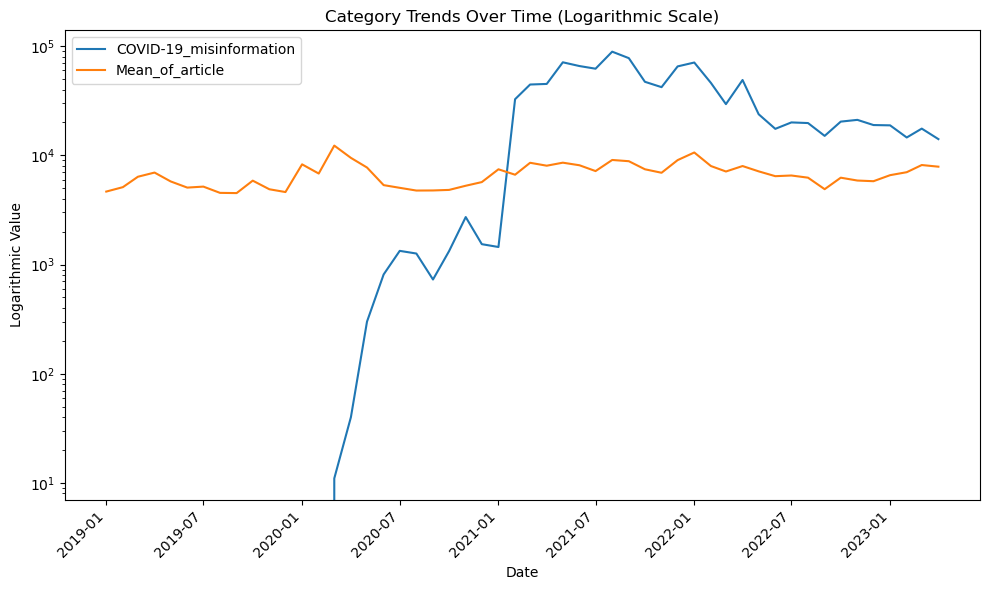

In [ ]:
plot_category_trends(filtered_health__df,use_log_scale=True)

``We see that the COVID-19_misinformation article was created in march 2020 and kept on gaining traction throughout the pandemic, compared to the other articles which had in average the same amount of view counts. However, we see a that the view count started to diminish towards the end of the Pandemic.``

# Part 2: COVID-19 fake news according to Wikipedia
**Objective of this part:**
- Show our ability to fetch wikipedia articles directly related to fake news.
- Understand the structure of the aggregation articles.

**Methodology:**
- For this data we parse the [COVID-19 misinformation](https://en.wikipedia.org/wiki/COVID-19_misinformation) page which has already done the job of listing the main COVID related fake news which appeared throughout the pandemic
- Pages focusing exclusively on summarising the fake news and conspiracy theories which emerged related to COVID already exist. For each fake news group, or fake news topic, we can scrape wikipedia articles which are directly related
- We then fetch the page view counts of these articles, and see how big of a role they played in the Wiki Covid fake news sphere
- We also check whether the article existed during the entire duration of the lockdown mobility period which we have: 2020-01-13 until 2020-04-20.

**Possible improvements (feasible now that this basic setup is established):**
- Add articles which have been created *during* the lockdown phase, as some most certainly relate to new theories
- At the end of this part, we do not consider conspiracy groups which have a low number of articles linked to them. This can make sense for parts such as "Hospital conditions" which truly is a more minor topic, but why is that so for "Vaccines"? It's because wikipedia has specific pages dedicated to Vaccines and COVID-19 misinformation. A similar parsing of those pages could yield a bbigger dataset of linked articles and will be done in milestone 3, but for now we just wanted to show basic implementation of the tools developed
- Study a period wider than the lockdown period to see how the baseline evolved, this can give us information about the efforts done by wikipedia to create new articles related to these fake news, and to see their relative effectiveness
- Expand this study to multiple languages, as these "summary" articles exist for multiple languages
- The inclusion of a *t-test* to determine whether or not the increase in page views from the articles which we have selected is significantly different, or not, from the increase of views in other articles. For this, we can use general fake News articles as a baseline (see part 1), as well as all the articles on wikipedia.

## 2.1 Fetching links and view counts

``We first scrape the data from the selected Wiki article``

In [62]:
article_title = "COVID-19 misinformation"
headings_df = scrape_wikipedia_sub_subheadings_with_links(article_title)

selected_parts = ['Virus origin',
       'Polymerase chain reaction testing', 'Symptoms and severity',
       'Incidence and mortality', 'Disease spread', 'Prevention',
       'Vaccines', 'Hospital conditions', 'Treatment']
headings_df_red = headings_df[headings_df['Main Heading'].isin(selected_parts)]

``From the selected articles, we only keep those which are present in the wiki_pageviews dataset as this allows us to ensure we have viewcount info for them during the desired period. ``

In [64]:
existing_articles_df = pd.read_csv('Data/topics_linked.csv', usecols=['index'])
headings_df_non_usable = headings_df_red[~headings_df_red['Linked_Article'].isin(existing_articles_df["index"])]
headings_df_usable = headings_df_red[headings_df_red['Linked_Article'].isin(existing_articles_df["index"])]
headings_df_usable = headings_df_usable[headings_df_usable["Linked_Article"] != "Coronavirus"]

pie_chart_df = headings_df_usable.copy()
headings_df_fetch = pie_chart_df.drop_duplicates(subset=['Linked_Article'])

``We fetch the view count and plot some stats. We can clearly see that these sets are not distributed evenly since plotting the mean or the median changes our pie plots a lot. This makes sense due to the viral nature of certain topics.``

``This still gives us important information about the relative importance of each fake news group.``

In [65]:
viewcount = fetch_viewcount_df(headings_df_fetch)
summed_viewcount = viewcount.groupby('article')['views'].sum().reset_index()
summed_viewcount = summed_viewcount.rename(columns={'article': 'Linked_Article'})
result_df = pd.merge(pie_chart_df, summed_viewcount, left_on='Linked_Article', right_on='Linked_Article', how='inner')


In [ ]:
# Compute basic metrics
result = result_df.groupby('Main Heading').agg({
    'views': ['sum', 'mean', 'count', 'median']
}).reset_index()

result.columns = ['Main Heading', 'Sum', 'Mean', 'Count', 'Median']

In [ ]:
#filter
result = result[result["Count"] > 30]
result

,Main Heading,Sum,Mean,Count,Median
0,Disease spread,10059175,304823.484848,33,206870.0
2,Incidence and mortality,6706840,181265.945946,37,75532.0
4,Prevention,28164472,640101.636364,44,144488.5
6,Treatment,26827306,506175.584906,53,151328.0
8,Virus origin,44863971,347782.720930,129,85162.0


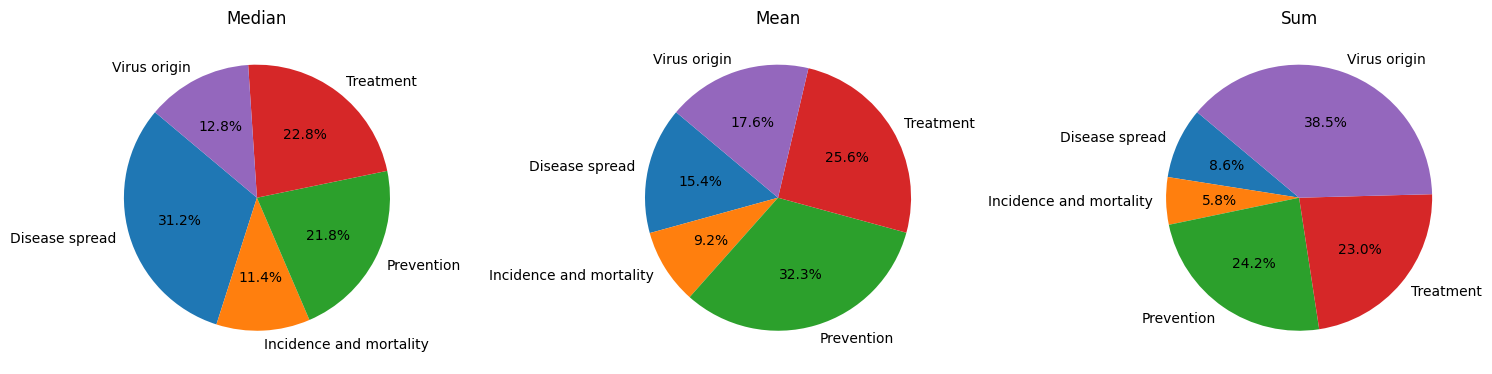

In [ ]:
# Create a 1x3 subplot grid for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Median Pie Chart
axes[0].pie(result['Median'], labels=result['Main Heading'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Median')

# Plot Mean Pie Chart
axes[1].pie(result['Mean'], labels=result['Main Heading'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Mean')

# Plot Sum Pie Chart
axes[2].pie(result['Sum'], labels=result['Main Heading'], autopct='%1.1f%%', startangle=140)
axes[2].set_title('Sum')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplot
plt.show()

## 2.2 A closer look at one of the sub categories

``We dive deeper into the constitution of the "Disease spread" category to see an example of the relative weights of different articles, and their evolution over time.``

``Though we probably need to enrich each of thee subcategories by eg. including the articles which emerged around that time, or considering the corresponding COVID-19 articles which have been ade about them afterwards,it will help us to determine the emergence time of fake news in terms of popularity.``

<ipython-input-89-8ff78815d23b>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = disease_spread_df.groupby('Subheading').mean()


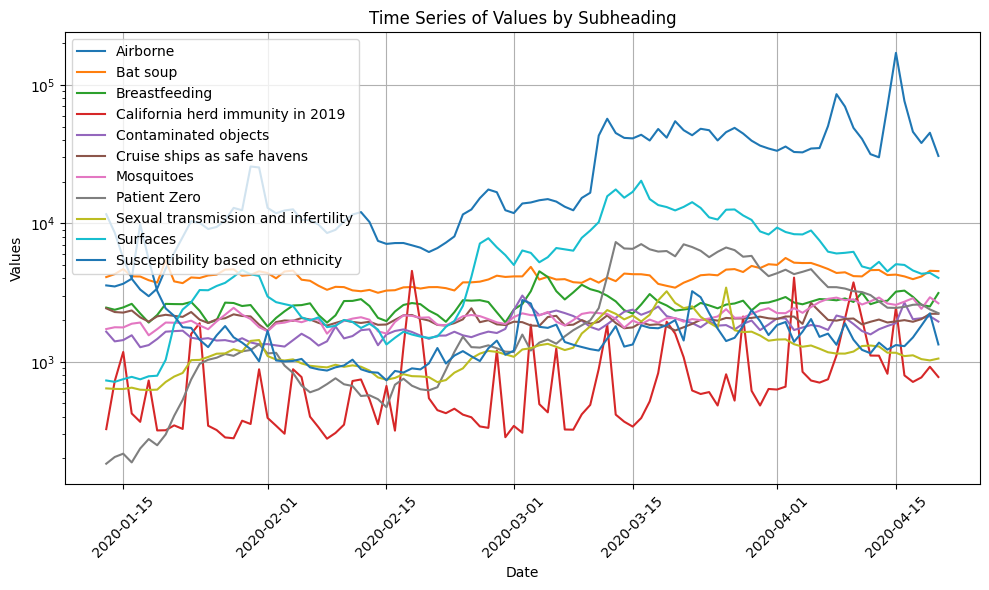

In [ ]:
# Pivot the DataFrame to reshape it
timeseries_df = headings_df_usable.copy()
pivot_df = viewcount.pivot(index='article', columns='timestamp', values='views')
pivot_df = pivot_df.reset_index()
pivot_df = pivot_df.rename(columns={'article': 'Linked_Article'})
timeseries_df = pd.merge(timeseries_df, pivot_df, left_on='Linked_Article', right_on='Linked_Article', how='inner')

# Select the disease spread category
disease_spread_df = timeseries_df[timeseries_df["Main Heading"]== "Disease spread"]

# Aggregate on the subheadings, which represent a fake claim.
view = disease_spread_df[["Subheading"]+ disease_spread_df.columns[5:103].tolist()]
mean_values = disease_spread_df.groupby('Subheading').mean()

# Transpose the dataframe so that dates are on the x-axis and subheadings are different lines
mean_values = mean_values.T

# Plotting the time series
plt.figure(figsize=(10, 6))
for subheading in mean_values.columns:
    plt.plot(mean_values.index, mean_values[subheading], label=subheading)

plt.yscale('log')  # Set the y-scale to logarithmic
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of Values by Subheading')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Part 3: COVID-19 fake vs real published news

**Objectives**

In this part, after exploring the Wikipedia landscape of fake news and misinformation during the lockdown period, we ask ourself if this is representative of the news that were circulating the internet (through social media, web news, ...). Specifically we want to answer the following questions:

- Is there an increase in fake news publication during COVID-19? What is the percentage of fake vs. real news on the subject for each language?
- What are the principal themes of fake news that emerged during COVID-19? are these common to the theories found on Wikipedia?
- How do the views of the themes of fake news in wikipedia compare with the surge in publication of the news? do the peak dates match?

**Methodology**

We base our study on the MM-COVID19 dataset of fake and real news, which was previously cleaned in "exploration.ipynb" to remove unuseful columns. The resulting cvs dataset was cleaned again to uniform the very disperse dates format (for simplicity this was done in Excel).

- For the first step we explore the data by counting all the news per language, separating into real news, fake news form the news that have the date of publication.

- Next, we plot the number of articles published during the months of the pandemic (January to July 2020), separating fake from real news for the three languages of interest (English, Italian, French).

- Then, we cluster the news based on the categories developed in Part 2) and we analyse the English news based on those.


**Possible improvements**

- Redo the analysis for all the languages present in the dataset.
- Take into consideration the mobility data to have a more quantitativ analysis.
- Study the difference in origin for the data (social media or web news).

### 3.1 MM-COVID19 database exploration: profile of fake news per language in time

In [66]:
#we import the main dataset to use
main_df = pd.read_csv("Data/news_dataset_cl.csv").copy()

#reduce the dimensions to make the code faster since for now we don't need the clames
df2 = main_df[["news_id","statement","fact_url", "label", "lang", "time", "Cluster"]].copy()

#We print the dimensions before and after filtering
print(main_df.shape, df2.shape)

(9457, 13) (9457, 7)


``First we plot the number of news per language, differentiating between news with date and without. In the ones with the date, we count the number of real and fake news``

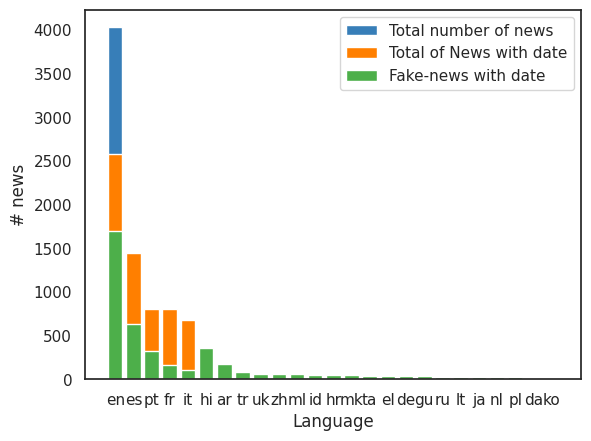

In [ ]:
# Counting the total of news per language
filter_count = "label" 
an_lang   = pd.DataFrame(df2.groupby("lang")[filter_count].count())
languages = an_lang.sort_values(by=filter_count, ascending=False).head(20)
bar(languages.index, languages[filter_count],label="Total number of news")
ylabel("# news")
xlabel("Language")

# Counting the total of news per language that are useful
filter_count = "time" 
an_lang   = pd.DataFrame(df2.groupby("lang")[filter_count].count())
languages = an_lang.sort_values(by=filter_count, ascending=False).head(25)
bar(languages.index, languages[filter_count], label="Total of News with date")

# Counting the total of fake news per language that are useful
filter_count = "time" 
an_lang   = pd.DataFrame(df2[df2["label"]=="fake"].groupby("lang")[filter_count].count())
languages = an_lang.sort_values(by=filter_count, ascending=False).head(25)
bar(languages.index, languages[filter_count], label="Fake-news with date")
legend()

``Now we plot the profile of fake news per language in time``

In [ ]:
# We select the languages to analyze 
languages_analyze = ["en", "fr", "it"]
count_news_fake = []
count_news_real = []

# Analyzing fake news count
for lang_fake in languages_analyze:
    df_lang_fake = pd.DataFrame(df2[(df2["lang"] == lang_fake) & (df2["label"] == "fake")].groupby("time")["news_id"].count())
    df_new_fake = df_lang_fake.rename(columns={'news_id': f"{lang_fake}-fake"})
    count_news_fake.append(df_new_fake)

# Concatenating the results for fake news
result_fake = pd.concat(count_news_fake, axis=1)
results_fake = result_fake.fillna(0)
df_fake = results_fake


# Analyzing real news count
for lang_real in languages_analyze:
    df_lang_real = pd.DataFrame(df2[(df2["lang"] == lang_real) & (df2["label"] == "real")].groupby("time")["news_id"].count())
    df_new_real = df_lang_real.rename(columns={'news_id': f"{lang_real}-real"})
    count_news_real.append(df_new_real)

# Concatenating the results for real news
result_real = pd.concat(count_news_real, axis=1)
results_real = result_real.fillna(0)
df_real = results_real

# Concatenating fake and real news counts, sorting the format
df_consolidated = pd.concat([df_fake, df_real], axis=1).fillna(0)
df_consolidated['time_1'] = pd.to_datetime(df_consolidated.index, format='%d/%m/%Y')
df_consolidated = df_consolidated.sort_values(by='time_1')


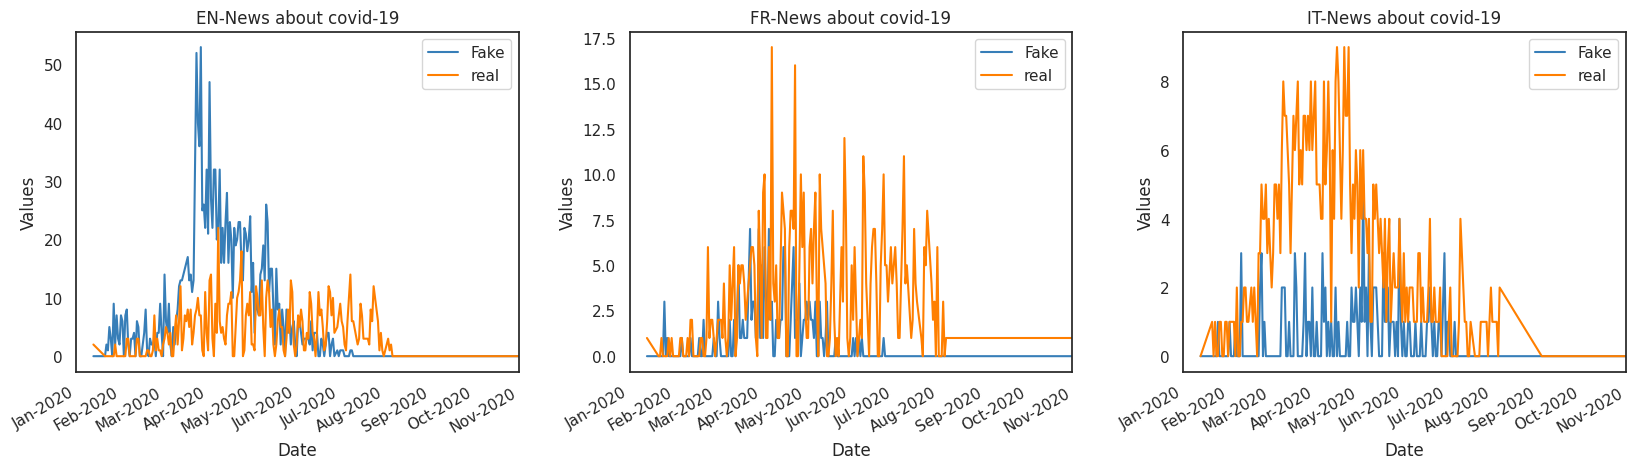

In [ ]:
#Now we plot our results
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 5), \
                           gridspec_kw={'wspace': 0.25, 'hspace': 0.45, 'width_ratios': [1, 1,1]})


ax[0].plot(df_consolidated["time_1"], df_consolidated["en-fake"], label='Fake')
ax[0].plot(df_consolidated["time_1"], df_consolidated["en-real"], label='real')
ax[0].set_title('EN-News about covid-19')
date_format = DateFormatter('%b-%Y')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels if needed

ax[1].plot(df_consolidated["time_1"], df_consolidated["fr-fake"], label='Fake')
ax[1].plot(df_consolidated["time_1"], df_consolidated["fr-real"], label='real')
ax[1].set_title('FR-News about covid-19')
date_format = DateFormatter('%b-%Y')
ax[1].xaxis.set_major_formatter(date_format)
ax[1].tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels if needed

ax[2].plot(df_consolidated["time_1"], df_consolidated["it-fake"], label='Fake')
ax[2].plot(df_consolidated["time_1"], df_consolidated["it-real"], label='real')
ax[2].set_title('IT-News about covid-19')
date_format = DateFormatter('%b-%Y')
ax[2].xaxis.set_major_formatter(date_format)
ax[2].tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels if needed


# Setting the x-axis locator
for i in range(0,3):
    locator = AutoDateLocator(minticks=9, maxticks=12)  # Adjust min and max ticks as needed
    plt.gca().xaxis.set_major_locator(locator)
    
    # Formatting the date labels
    date_format = DateFormatter('%b-%Y')
    
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    
    # Adding labels and title
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Values')
    
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2020, 11, 1)
    ax[i].set_xlim(start_date, end_date)
    # Display the legend
    ax[i].legend()

# Show the plot
plt.show()

``We can see there are quite big differences between the three plots: for French and Italian it's interesting to notice that the biggest number of published news are actually real news, with peaks during April 2020. the fake news for French seem to concentrate also around April and diminish in June. For Italian the publication of fake news is constant in time and extended until August. As for the English news, the biggest number is given by fake news, creating a very sharp peak in april, slowly diminishing in July. The number of real news is quite constant.``

``Now we dig a layer deeper, what are the topics of these published news, and do they link with the misinformation topics common in Wikipedia.``

### 3.2 Clustering of fake news 

Here we concentrate only on English news, and try to analyse the themes of the news present in the MM-COVID19 dataset, comparing them to the topics clustered from the Covid19 misinformation Wikipedia page analysed in Part 2.

In [ ]:
#we restrict the main cleaned dataset to only keep the english news
main_df_eng = main_df[main_df['lang'] == 'en'].copy()
print("Number of English news:",len(main_df_eng))

##topics taken from covid-19_misinformation.csv, 
#hand picked to maximize the research in the MM-covid dataset with something that makes sense

words_to_search =["spread","Wuhan", "Canada", "China accusations", "china mortality", "Russia accusations",
                  "Muslim","USA mortality", "Germany", "Britain", "Jewish origin", "5G", "bat", 
                  "ivermectin", "hydroxychloroquine", "treatment", "bioweapon", "mortality", "prevention",
                  "vitamin D", "silver", "vitamin C", "virus origin", "meteor", "casedemic", 
                  "patient zero", "lifetime", "mosquitos", "breastfeeding", "hand sanitizer", "face masks", "whistleblower",
                 "deaths", "immunity", "airborne", "surfaces", "ethnicity", "large gathering", "cruise ships",
                 "alcohol", "tobacco", "drugs", "drink", "religious protection", "spraying", "food", "flu", "2-Deoxy-D-glucose", 
                 "mustard", "organ trafficking", "Simpsons", "wildlife", "origin", "Jhons Hopkins", "virus origin", "infertility"]

# Create a new column 'category' and set it to be the word if the word is present in the 'claim' column,
#otherwise set it to NaN

main_df_eng['category'] = main_df_eng['claim'].apply(lambda x: [word for word in words_to_search if word.lower() in str(x).lower()]).copy()

# Filter the DataFrame to include only the classified rows
filtered_df = main_df_eng[main_df_eng['category'].apply(lambda x: bool(x))].copy()
filtered_df['category'] = filtered_df['category'].apply(lambda x: ', '.join(x))


#Let's see how many we classified
print("Number of classified news:",len(filtered_df))

Number of English news: 4032
Number of classified news: 706


``We aim at improving upon this number in the next stages of our project!``

In [ ]:
#Let's print the top 15 categories based on the number of news per topic
category_counts = filtered_df['category'].value_counts()
label_counts = filtered_df['label'].value_counts()
print("Number of unique categories: ", len(category_counts))
print("Count of news per category (top ten):", 
      category_counts[:15])

Number of unique categories:  83
Count of news per category (top ten): category
spread       89
bat          65
food         51
Wuhan        50
treatment    45
5G           35
flu          35
deaths       32
Muslim       28
drink        26
Name: count, dtype: int64


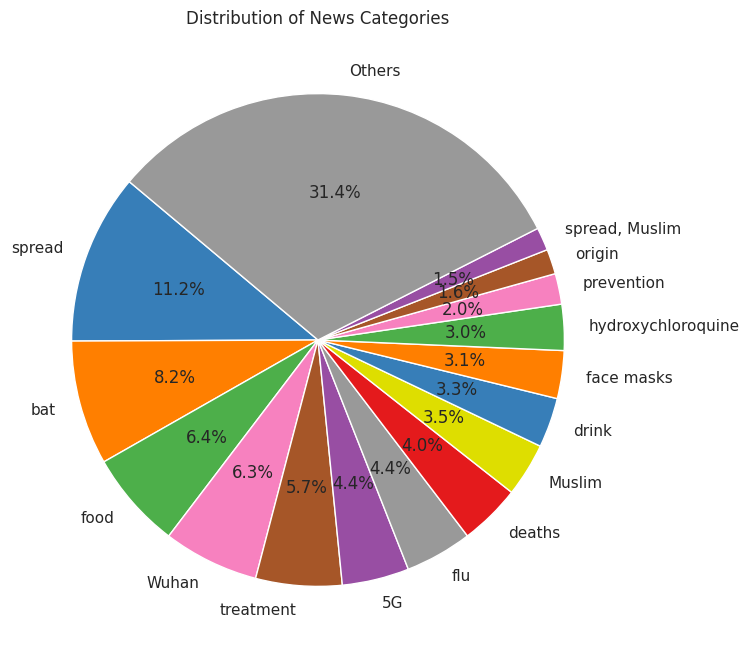

In [ ]:
#Now we plot the top 15 in a pie chart for better visualisation
top_categories = category_counts.head(15)

# Sum the counts of the remaining categories
other_categories_count = category_counts.iloc[10:].sum()

# Create a new series with top categories and 'Others'
combined_categories = pd.concat([top_categories, pd.Series({'Others': other_categories_count})])

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined_categories, labels=combined_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of News Categories')
plt.show()

``So now we have a pool of classified data to study. Now the question is, how well do the themes of the two datasets match? we can count how many words from the misinformation dataset have been found in the MM-dataset.``

In [ ]:
#Let's see how many words have been found:

# Flatten the 'category' lists into a single list of words
all_found_words = [word for sublist in filtered_df['category'] for word in sublist]

# Count the unique found words
unique_found_words = set(all_found_words)
num_unique_found_words = len(unique_found_words)

# Calculate the percentage of words found
percentage_found = int( (num_unique_found_words / len(words_to_search)) * 100)

# Print the results
print("\nPercentage of words found:", percentage_found,"%")


Percentage of words found: 62 %


``Roughly 60% of the most famous misinformation topics in wikipedia appear in the news considered by the MM-dataset. This is good news, it means that the MM-dataset is representative enough of covid's misinformation realm, and that the wikipedia "Covid-19 misinformation" is reliable ad complete.
But how many of these news are actually fake news?``

In [ ]:
#create a list of categories to count the real and fake ones
category_label_list = []
for _, row in filtered_df.iterrows():
    category_label_list.append({'category': row['category'], 'label': row['label']})

# Create a DataFrame from the list of dictionaries
category_label_df = pd.DataFrame(category_label_list).copy()

# Pivot the table to have 'fake' and 'real' counts as columns
label_counts_per_category = category_label_df.pivot_table(index='category', columns='label', aggfunc='size', fill_value=0)
label_counts_per_category = label_counts_per_category.reindex(index=category_counts.index)


# Print the counts
print("\nLabel Counts per Category:\n", label_counts_per_category.head(15))


#check if the total of categories and news is still correct and that we haven't lost anything
print("number fo categories:", len(label_counts_per_category))
total_fake_labels = label_counts_per_category['fake'].sum()
total_real_labels = label_counts_per_category['real'].sum()
print("\nTotal Fake and Real Labels:", total_fake_labels + total_real_labels)


Label Counts per Category:
 label               fake  real
category                      
spread                57    32
bat                   18    47
food                  40    11
Wuhan                 44     6
treatment             20    25
5G                    32     3
flu                   26     9
deaths                27     5
Muslim                28     0
drink                 26     0
face masks            21     4
hydroxychloroquine    19     5
prevention             7     9
origin                10     3
spread, Muslim        12     0
number fo categories: 83

Total Fake and Real Labels: 706


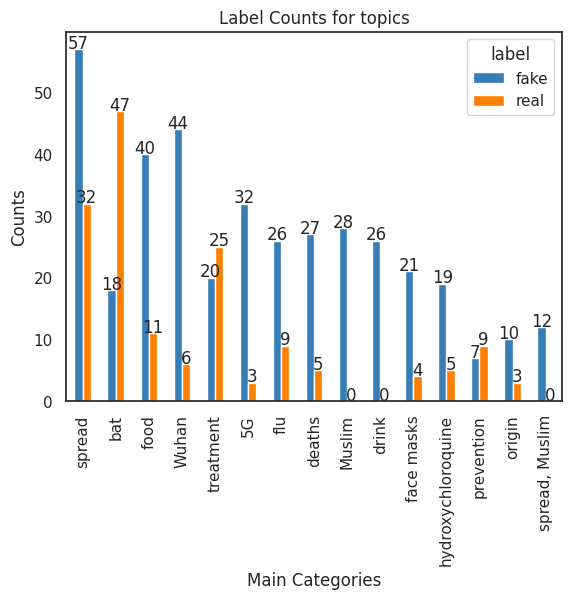

In [ ]:
#Let's plot these in a bar plot 
ax = label_counts_per_category.head(15).plot(kind='bar', stacked=False)
plt.title('Label Counts for topics')
plt.xlabel('Main Categories')
plt.ylabel('Counts')

# Add annotations to display the total count on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height+1), ha='center', va='center')

plt.show()

``We can see that the results are quite dispersive, to gain a logical understanding of what is most published, let's try to further group the topics under 5 big headings: news about the origin of covid, its spread, prevention, treatment, and mortality.``

Total number of news: 706


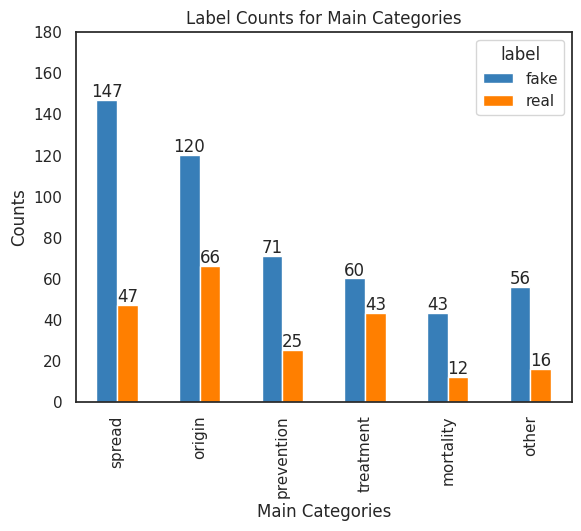

Values mapped to 'others':
Index(['food', 'Canada', 'wildlife', 'Simpsons', 'tobacco', 'Britain',
       '5G, immunity', 'whistleblower', 'spread, treatment', 'Britain, 5G',
       'Canada, Muslim', 'whistleblower, drink'],
      dtype='object', name='category')


In [ ]:
main_category = ["origin", "mortality", "spread", "prevention", "treatment"]

# Mapping dictionary for subcategories to main categories. 
#This was done by hand to ensure that the right combination of topics will lead to the right mapping of main_category.

subcategory_mapping = {
    'bat':'origin',
    'bat, drink':'origin',
    'Wuhan': 'origin',
    'Wuhan, bioweapon':'origin',
    'airborne': 'origin',
    'bioweapon': 'origin',
    'virus origin': 'origin',
    'origin': 'origin',
    'Canada, bioweapon' : 'origin',
    '5G': 'origin',
    'bat, flu':'origin',
    'spread, origin':'origin',
    'bioweapon, origin':'origin',
    'virus origin, origin, virus origin': 'origin',
    'Wuhan, bat, virus origin, origin, virus origin':'origin',
    'bat, patient zero':'origin', 
    'Wuhan, drink':'origin',
    'bat, origin':'origin',
    'Wuhan, origin':'origin',
    'patient zero': 'origin',
    
    'deaths': 'mortality',
    'Germany': 'mortality',
    'mortality':'mortality',
    'deaths, flu':'mortality',
    'mortality, flu':'mortality',
    'mortality, ethnicity' : 'mortality',
    'mortality, vitamin D':'mortality',
    'Wuhan, deaths': 'mortality',
    'Germany, deaths':'mortality',
    'deaths, immunity':'mortality',
    'deaths, drink':'mortality',
    
    'flu': 'spread',
    'immunity': 'spread',
    'large gathering': 'spread',
    'spraying': 'spread',
    'Muslim': 'spread',
    'Muslim, food': 'spread',                                   
    'Muslim, large gathering': 'spread',                         
    'Muslim, spread': 'spread',                                
    'Muslim, spread, food' : 'spread', 
    'Wuhan, spread' : 'spread',
    'spread':'spread',
    'infertility': 'spread',
    'spreading':'spread',
    'diffusing':'spread',
    'surfaces':'spread',
    'spread, food':'spread',
    'bat, spread':'spread',
    'spread, face masks':'spread',
    'spread, spraying':'spread',
    'spread, infertility': 'spread', 
    'spread, alcohol':'spread',
    'spread, flu':'spread',
    'spread, Wuhan':'spread',
    'spread, hydroxychloroquine, drugs':'spread',
    'spread, bat': 'spread',
    'spread, Muslim':'spread',
    'spread, Muslim, food':'spread',
    
    'hand sanitizer': 'prevention',
    'drink': 'prevention',
    'face masks': 'prevention',
    'alcohol': 'prevention',
    'immunity':'prevention',
    'prevention': 'prevention',
    'prevention, spread':'prevention',
    'hand sanitizer, alcohol':'prevention',
    'immunity, food':'prevention',
    'prevention, deaths, flu':'prevention',
    'spread, prevention':'prevention',
    
    'hydroxychloroquine':'treatment',
    'drugs':'treatment',
    'mustard':'treatment',
    'vitamin C':'treatment',
    'vitamin D':'treatment',
    'treatment, vitamin C' :'treatment',
    'treatment':'treatment',
    'hydroxychloroquine, treatment':'treatment',
    'treatment, prevention':'treatment',
    'hydroxychloroquine, flu': 'treatment',
    'treatment, food':'treatment',
    'hydroxychloroquine, treatment, drink': 'treatment',
    'hydroxychloroquine, spread, drugs':'treatment',
    'treatment, spread':'treatment',
    'silver':'treatment',
    'alcohol, drink':'treatment'
    
}

#Now we create a new column for the main category and fill it with the mapping dictionary. What is not mapped is ategorized as other.
label_counts_per_category['main_category'] = label_counts_per_category.index.map(subcategory_mapping).fillna('other')

# Aggregate categories into main categories and sum the number of news
label_counts_per_main_category = label_counts_per_category.groupby('main_category').sum()

#print thr total number of news to be sure we didn't lose anything
total_fake = label_counts_per_main_category['fake'].sum()
total_real = label_counts_per_main_category['real'].sum()
total_news = total_fake + total_real
print("Total number of news:", total_news)


order = ["spread","origin",  "prevention", "treatment", "mortality", "other"]
#plot the news count for each main category
ax = label_counts_per_main_category.loc[order].plot(kind='bar', stacked=False)

plt.title('Label Counts for Main Categories')
plt.ylim(0,180)
plt.xlabel('Main Categories')
plt.ylabel('Counts')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height+4), ha='center', va='center')

plt.show()

#printing also the categories in the "Others" to see what we can't categorize
print("Values mapped to 'others':")
print(label_counts_per_category.index[label_counts_per_category['main_category'] == 'other'])

``It seems that the majority of fake news are about the spread and origin of covid. From the previous plot we know that the majority of theories about the origin of covid are about Wuhan, bats, and 5G, while for spreading we have mainly news about the flu, large gatherings, and Muslims.``

``It's interesting to see that there are some theories that cannot really be categorized in one of the big 5 categories chosen. The main one is food, for which the news are very diverse in the mesage that wanted to convey.``

``The next analysis will be done in time, when were the news published? and can they be linked with the views in wikipedia pages of the corresponding theories? For this we further restrict our analysis on just the number of news that had a publication date.``

In [ ]:
#First, let's filter the main database to keep only the news with publication dates
main_df_eng_date = main_df_eng.dropna(subset=['time']).copy()

#now we repeat the last analysis
main_df_eng_date['category'] = main_df_eng_date['claim'].apply(lambda x: [word for word in words_to_search if word.lower() in str(x).lower()]).copy()

# Filter the DataFrame to include only the classified rows
filtered_df = main_df_eng_date[main_df_eng_date['category'].apply(lambda x: bool(x))].copy()
filtered_df['category'] = filtered_df['category'].apply(lambda x: ', '.join(x))


#Let's see how many we classified
print("Number of classified news:",len(filtered_df))


category_counts = filtered_df['category'].value_counts()
label_counts = filtered_df['label'].value_counts()
print("Number of unique categories: ", len(category_counts))
print("Count of news per category (top ten):", 
      category_counts[:5])

Number of classified news: 443
Number of unique categories:  67
Count of news per category (top ten): category
bat       48
spread    46
food      44
Wuhan     29
Muslim    27
Name: count, dtype: int64


In [ ]:
#create a list of categories to count the real and fake ones
category_label_list = []
for _, row in filtered_df.iterrows():
    category_label_list.append({'category': row['category'], 'label': row['label']})

# Create a DataFrame from the list of dictionaries
category_label_df = pd.DataFrame(category_label_list).copy()

# Pivot the table to have 'fake' and 'real' counts as columns
label_counts_per_category = category_label_df.pivot_table(index='category', columns='label', aggfunc='size', fill_value=0)
label_counts_per_category = label_counts_per_category.reindex(index=category_counts.index)


# Print the counts
print("\nLabel Counts per Category:\n", label_counts_per_category.head(5))


#check if the total of categories and news is still correct and that we haven't lost anything
print("number fo categories:", len(label_counts_per_category))
total_fake_labels = label_counts_per_category['fake'].sum()
total_real_labels = label_counts_per_category['real'].sum()
print("\nTotal Fake and Real Labels:", total_fake_labels + total_real_labels)



Label Counts per Category:
 label     fake  real
category            
bat         18    30
spread      46     0
food        39     5
Wuhan       29     0
Muslim      27     0
number fo categories: 67

Total Fake and Real Labels: 443


Total number of news: 443


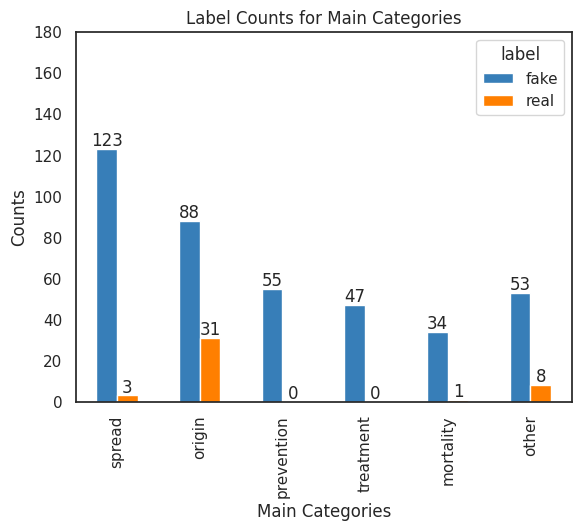

Values mapped to 'others':
Index(['food', 'Canada', 'tobacco', 'Canada, Muslim', '5G, immunity',
       'Britain', 'whistleblower, drink', 'Britain, 5G', 'Simpsons',
       'whistleblower'],
      dtype='object', name='category')


In [ ]:
#Now we create a new column for the main category and fill it with the mapping dictionary. What is not mapped is ategorized as other.
label_counts_per_category['main_category'] = label_counts_per_category.index.map(subcategory_mapping).fillna('other')

# Aggregate categories into main categories and sum the number of news
label_counts_per_main_category = label_counts_per_category.groupby('main_category').sum()

#print thr total number of news to be sure we didn't lose anything
total_fake = label_counts_per_main_category['fake'].sum()
total_real = label_counts_per_main_category['real'].sum()
total_news = total_fake + total_real
print("Total number of news:", total_news)


order = ["spread","origin",  "prevention", "treatment", "mortality", "other"]
#plot the news count for each main category
ax = label_counts_per_main_category.loc[order].plot(kind='bar', stacked=False)

plt.title('Label Counts for Main Categories')
plt.ylim(0,180)
plt.xlabel('Main Categories')
plt.ylabel('Counts')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height+4), ha='center', va='center')

plt.show()

# Add this before the mapping step
print("Values mapped to 'others':")
print(label_counts_per_category.index[label_counts_per_category['main_category'] == 'other'])



``We can see the trend for the fake news is very similar, just with less data and sometimes no real news related. Let's try to analyse the trend in time anyways. for this we choose (for now) the two biggest categories, spread and origin of Covid, and plot the count of published news in time.``

### 3.3 Comparison of MM-COVID19 news with Wikipedia pageview count in time

First we plot the news count in time, then we compare it with the pageview count for the 

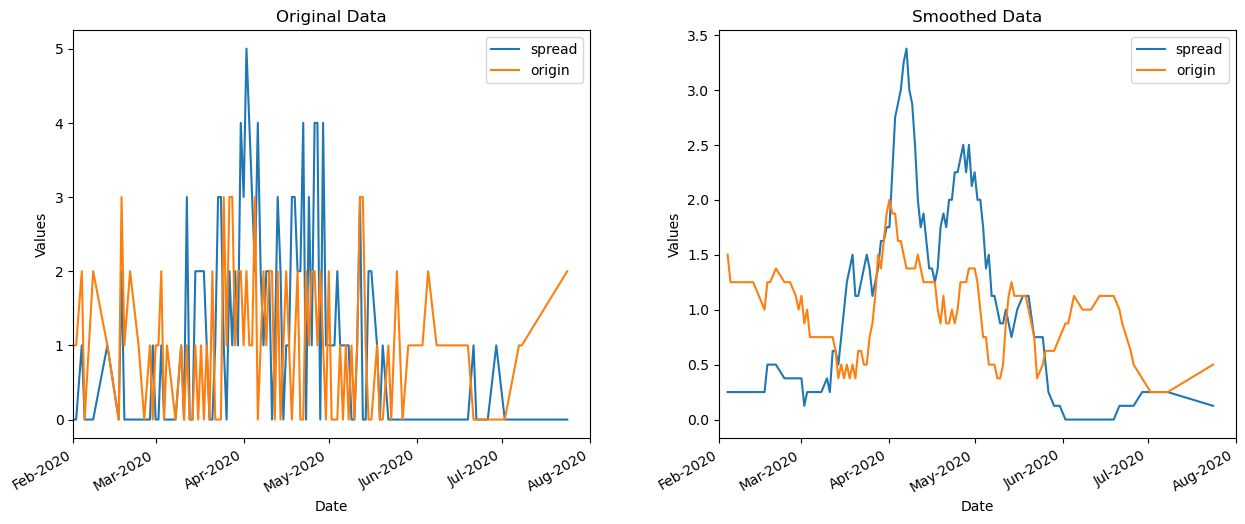

In [ ]:
category_to_plot = ['spread', 'origin']

#we first filter the data and change the date formats
filtered_df['time'] = pd.to_datetime(filtered_df['time'], format='%d/%m/%Y')

filtered_df['main_category'] = filtered_df['category'].map(subcategory_mapping).fillna('other')

# Group by both 'time' and 'main_category' and sum the counts
label_counts_over_time = filtered_df.groupby(['time', 'main_category']).size().unstack(fill_value=0)

# Now we plot the counts in time 
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 6), \
                           gridspec_kw={'wspace': 0.25, 'hspace': 0.45, 'width_ratios': [1,1]})
for category in category_to_plot:
    category_data = label_counts_over_time[category]
    ax[0].plot(category_data.index, category_data, label=category)
    date_format = DateFormatter('%b-%Y')
    ax[0].xaxis.set_major_formatter(date_format)
    ax[0].tick_params(axis='x', rotation=45) 
ax[0].set_title('Original Data')

# We smooth the data to observe peaks more easily, we perform a moving average (rolling mean).
for category in category_to_plot:
    category_data = label_counts_over_time[category]
    category_data_smooth = category_data.rolling(window=8).mean()
    ax[1].plot(category_data.index, category_data_smooth, label=category)
    
ax[1].set_title('Smoothed Data')


for i in range(0,2):
    locator = AutoDateLocator(minticks=5, maxticks=12)  
    plt.gca().xaxis.set_major_locator(locator)
    
    # Formatting the date labels
    date_format = DateFormatter('%b-%Y')
    
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    

    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Counts')
    
    start_date = datetime(2020, 2, 1)
    end_date = datetime(2020, 8, 1)
    ax[i].set_xlim(start_date, end_date)
    ax[i].legend()

``It makes sense that the origin fake news are more disperseed in time, while the spread seem to be concentrated in beginning of april. when the lockdown started, more news on how desease spread. ``

``Now let's try to compare this with the wikipedia views of the related conspiracy theories``

``We selected 2 clusters wiht the highest amount of news to do the comparison of Wikipedia visits along the time and number of news along the time. These clusters are: Virus origin and Disease spread.``

In [ ]:
# Importing misinformation database from part II
wiki_pages_links = pd.read_csv("Data/covid-19_misinformation5.csv").copy()

#Filtering misinformation with the selected clusters
word_cluster_1= "Virus origin" 
word_cluster_2= "Disease spread"
wiki_cluster_links_1 = wiki_pages_links[(wiki_pages_links["Main Heading"].str.contains(word_cluster_1))].copy()
wiki_cluster_links_2 = wiki_pages_links[(wiki_pages_links["Main Heading"].str.contains(word_cluster_2))].copy()

# Cleaning the clusters to only obtain words searcheable in wikipedia API
def extract_clean_text(links):
    cleaned_links = []
    for link in links:
        if '/wiki/' in link:
            extracted_text = link.split('/wiki/')[1].split('#')[0].replace('_', ' ')
            cleaned_links.append(extracted_text)
    return cleaned_links

# Convert string representation of list to actual list using ast.literal_eval and apply the function
wiki_cluster_links_1["Cleaned_Text"] = wiki_cluster_links_1["Links"].apply(lambda x: extract_clean_text(ast.literal_eval(x)))
wiki_cluster_links_2["Cleaned_Text"] = wiki_cluster_links_2["Links"].apply(lambda x: extract_clean_text(ast.literal_eval(x)))

In [ ]:
# Looking for all the articles in the cluster 1 which correspond to Virus Origin 

list_cluster_1 = list(wiki_cluster_links_1["Cleaned_Text"])
language      = "en"
final_count_1 =[]
for i in list_cluster_1:
    results   = fetch_pageview_count(language, i)
    merged_df = pd.concat(results, ignore_index=True)
    #Grouping the dataframe to sum up the views
    merged_df = merged_df.groupby(['timestamp'])["views"].sum()
    final_count_1.append(pd.DataFrame(merged_df))

In [ ]:
# Looking for all the articles in the cluster 2 which correspond to Spread

list_cluster_2 = list(wiki_cluster_links_2["Cleaned_Text"])
del list_cluster_2[7] # Outlier - this element has an empty list that doesn't allow to concatenate the data frame
final_count_2 =[]
for i in list_cluster_2:
    results   = fetch_pageview_count(language, i)
    merged_df = pd.concat(results, ignore_index=True)
    #Grouping by date the dataframe to sum up the views
    merged_df = merged_df.groupby(['timestamp'])["views"].sum()
    final_count_2.append(pd.DataFrame(merged_df))

In [ ]:
# Concatenating all the dataframes
final_views_1= pd.concat(final_count_1, ignore_index=False) 
final_views_2= pd.concat(final_count_2, ignore_index=False) 

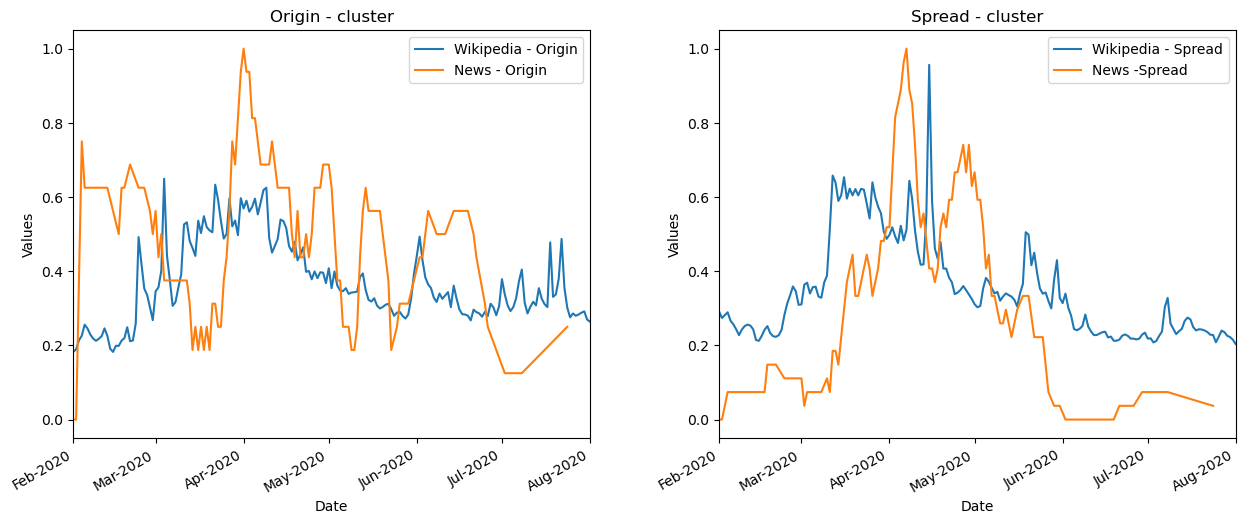

In [ ]:
# Grouping the new data frame to get the final number of visits
data_1 = final_views_1.groupby(['timestamp']).sum()
data_2 = final_views_2.groupby(['timestamp']).sum()

# # Convert the 'time' index to a datetime format
data_1['time_1'] = pd.to_datetime(data_1.index, format='%d/%m/%Y')
data_2['time_1'] = pd.to_datetime(data_2.index, format='%d/%m/%Y')

#ploting the normalized result to compare the peaks in visits of wikipedia and number of news
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 6), \
                           gridspec_kw={'wspace': 0.25, 'hspace': 0.45, 'width_ratios': [1,1]})


ax[0].plot(data_1["time_1"][1:1000], normal_data(data_1["views"][1:1000]), label='Wikipedia - Origin')
category_data = label_counts_over_time[category_to_plot[1]]
category_data_smooth = category_data.rolling(window=8).mean()
ax[0].plot(category_data.index,normal_data(category_data_smooth.fillna(0)), label="News - Origin")
    
ax[0].set_title('Smoothed Data')
ax[0].set_title('Origin - cluster')
date_format = DateFormatter('%b-%Y')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels if needed

ax[1].plot(data_2["time_1"][1:1000],normal_data( data_2["views"][1:1000]), label='Wikipedia - Spread')
category_data = label_counts_over_time[category_to_plot[0]]
category_data_smooth = category_data.rolling(window=8).mean()
ax[1].plot(category_data.index, normal_data(category_data_smooth.fillna(0)), label="News -Spread")

ax[1].set_title('Spread - cluster')
date_format = DateFormatter('%b-%Y')
ax[1].xaxis.set_major_formatter(date_format)
ax[1].tick_params(axis='x', rotation=45)  # Optional: Rotate x-axis labels if needed

for i in range(0,2):
    locator = AutoDateLocator(minticks=5, maxticks=12)  # Adjust min and max ticks as needed
    plt.gca().xaxis.set_major_locator(locator)
    
    # Formatting the date labels
    date_format = DateFormatter('%b-%Y')
    
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    
    # Adding labels and title
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Values')
    
    start_date = datetime(2020, 2, 1)
    end_date = datetime(2020, 8, 1)
    ax[i].set_xlim(start_date, end_date)
    # Display the legend
    ax[i].legend()

``We can see two plots that correspond to the normalized data of number of visits to Wikipedia articles related to the origin of COVID-19 (left-blue), and the number of visits to wikipedia articles related to the spreading of the COVID-19 (right-blue), respectively. Additionally, we can see the normalized and smoothed number of news articles (in blue) related to the mentioned topics. In the case of the origin of the virus we can see that between March and February, there is a prominent peak that is followed by a decrease and new increase around April and May. This period is of particular interest since we can see a qualitative relationship in the fact that given a trending topic in news, we have an increase in the wikipedia visits just after the topic. For the Spread cluster, we observe a similar tendency: there is peak of news around April and which is followed by peak in wikipedia visits. We expect that increasing the amount of news (including other languages), we are able to have a better definition of the trend which will be related to the specific dates.``

``Finally, in the next milestone, we are gonna present a quantitative method that allow us to see if we can correlate the peaks in news with the peaks in visits.  ``